In [1]:
import os
import random
import pickle
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import numpy as np
from IPython.display import HTML
import pandas as pd
from sklearn.decomposition import PCA
import plotly.express as px
%matplotlib widget
%matplotlib inline

In [2]:
file_path = "S:/Sem-5/Assignment/DA/wesad/notebooks/S5.csv"

In [3]:
data = pd.read_csv(f"{file_path}")
new_data = data[data["label"].isin((1,2,3,4))]
s = pd.Series([i+1 for i in range(len(new_data))])
new_data = new_data.set_index([s])


In [4]:
pca = PCA(n_components=3)

In [5]:
data_columns = [
    'chest_ECG', 'chest_EMG', 'chest_EDA', 'chest_Temp',
    'chest_Resp', 'chest_ACC1', 'chest_ACC2', 'chest_ACC3', 'wrist_BVP',
    'wrist_EDA', 'wrist_TEMP', 'wrist_ACC1', 'wrist_ACC2', 'wrist_ACC3']
#data_1 = data.copy()
X = new_data[data_columns]
#X = np.array(X)

In [6]:
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=3, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [7]:
pca.explained_variance_ratio_

array([0.91940077, 0.04111421, 0.03029539])

In [8]:
principalComponents=pca.fit_transform(X) 
principalDf=pd.DataFrame(data=principalComponents,columns=['principal component 1','principal component 2','principal component 3']) 
principalDf.head()
finalDf=pd.concat([principalDf,new_data['label']],axis=1)
finalDf.head()

principal component 1  principal component 2  principal component 3  label
0              25.571737              -5.139493              -6.705470    NaN
1              25.571733              -5.139678              -6.705733    1.0
2              25.571734              -5.139239              -6.704668    1.0
3              25.571735              -5.139442              -6.705108    1.0
4              25.571734              -5.139677              -6.705589    1.0

In [9]:
finalDf['label'][0]=1.0
finalDf[:1000]


principal component 1  principal component 2  principal component 3  \
0                25.571737              -5.139493              -6.705470   
1                25.571733              -5.139678              -6.705733   
2                25.571734              -5.139239              -6.704668   
3                25.571735              -5.139442              -6.705108   
4                25.571734              -5.139677              -6.705589   
..                     ...                    ...                    ...   
995              74.781756              -4.890494              -5.750192   
996              74.781755              -4.889783              -5.748395   
997              74.781757              -4.890080              -5.749419   
998              74.781760              -4.890037              -5.749249   
999              76.661770              -4.888906              -5.750387   

     label  
0      1.0  
1      1.0  
2      1.0  
3      1.0  
4      1.0  
..     ...  
995    1.0  
996    1.0  
997    1.0  
998    1.0  
999    1.0  

[1000 rows x 4 columns]

In [10]:
fig = px.scatter_3d(finalDf.sample(10000), x='principal component 1', y='principal component 2', z='principal component 3',
                    color='label')
fig.show()

In [11]:
df = finalDf.rename(columns={'principal component 1': 'p1', 'principal component 2': 'p2', 'principal component 3': 'p3'})

In [12]:
for i in df.columns:
    #df[i] = df[i].fillna(int(df[i].mean()))
    df[i] = df[i].fillna(0)
for i in df.columns:
    print(df[i].isnull().values.sum())

0
0
0
0


In [13]:
np.any(np.isnan(df))

False

In [22]:

np.all(np.isfinite(df))

True

In [15]:
df=df[:1000]

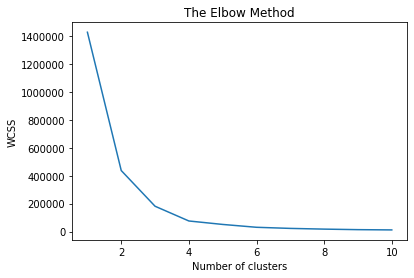

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Using the elbow method to find  the optimal number of clusters
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i,init='k-means++',max_iter=1000,n_init=10,random_state=0) #change value of max_iter
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [17]:
# Applying k-means to the cars dataset
kmeans = KMeans(n_clusters=3,init='k-means++',max_iter=1000,n_init=10,random_state=0) #change value of max_iter
kmeans.fit(df)
df['cluster']=kmeans.labels_


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=1000,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

In [20]:
fig = px.scatter_3d(df, x='p1', y='p2', z='p3', color='cluster')
fig.show()